## TEAM-1 : Yaprak A. - Hatice M. - Harun T.

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats   
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import missingno as msno
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"]=(10,6)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

### Load Dataset

In [3]:
df = pd.read_csv("insurance.csv")

### Check Out

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Preparation

#### Change string value to numerical

##### Drop Region Column - Sex will change 1 - 0 - Smoker will change 1- 0 

In [8]:
df = df.drop (columns = ["region"])

In [9]:
df["smoker"]=df["smoker"].replace("no", 0)   # Sigara içmeyen :  0

In [11]:
df["smoker"]=df["smoker"].replace("yes", 1)  # Sigara içen    :  1

In [12]:
df["sex"]=df["sex"].replace("male", 0)       # Erkek          :  0

In [13]:
df["sex"]=df["sex"].replace("female", 1)     # Kadın          :  1

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


### EDA - Visualization

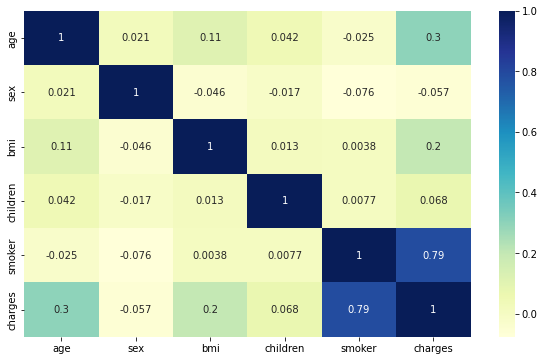

In [15]:
sns.heatmap(df.corr(),linewidths=0, cmap="YlGnBu", annot=True);

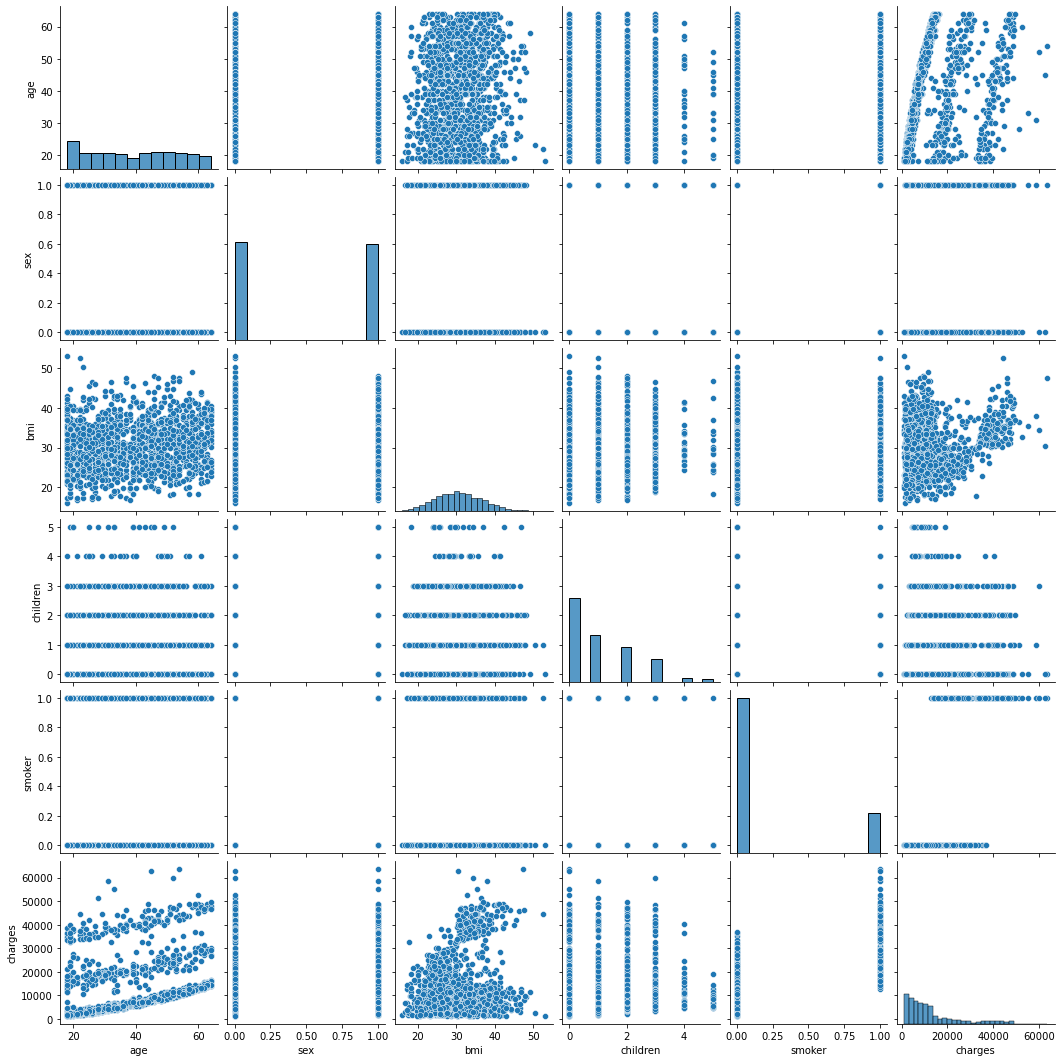

In [16]:
sns.pairplot(df);

In [18]:
for i in df.drop(columns = "charges").columns:       
    print(i, skew(df[i])) 

age 0.055610083072599126
sex 0.02092790200136671
bmi 0.28372857291709386
children 0.9373281163874423
smoker 1.4631235340273212


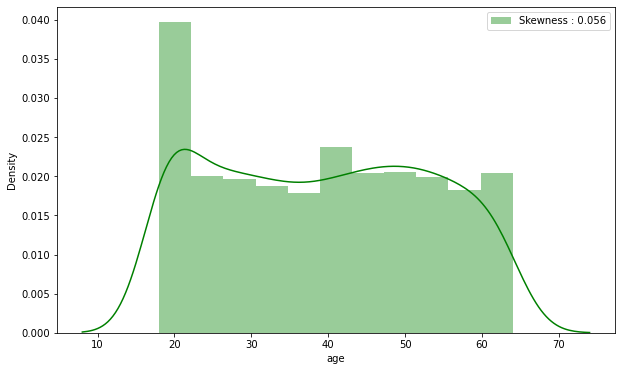

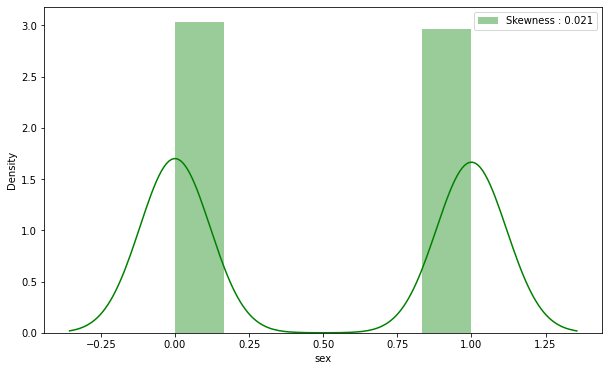

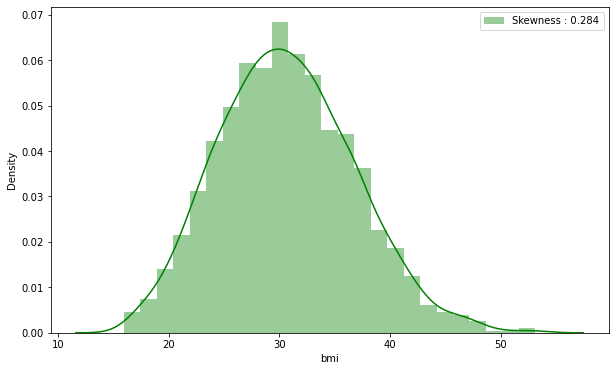

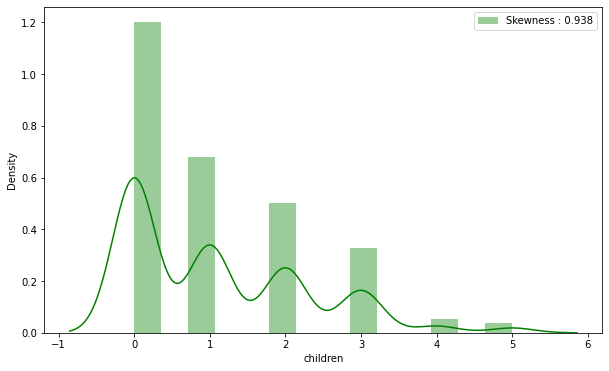

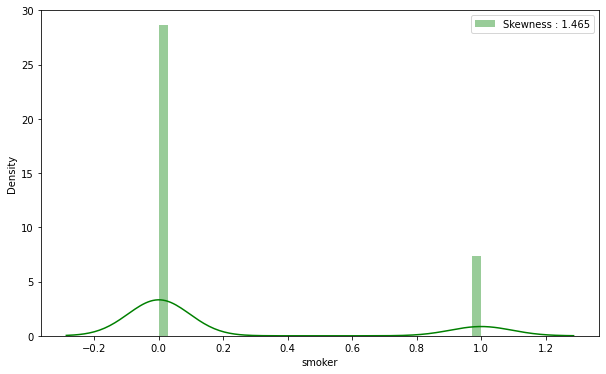

In [19]:
for j in df.drop(columns = "charges").columns:
    g = sns.distplot(df[j], color= "g", label= "Skewness : %.3f"%(df[j].skew()))
    g = g.legend(loc= "best")   
    plt.show()

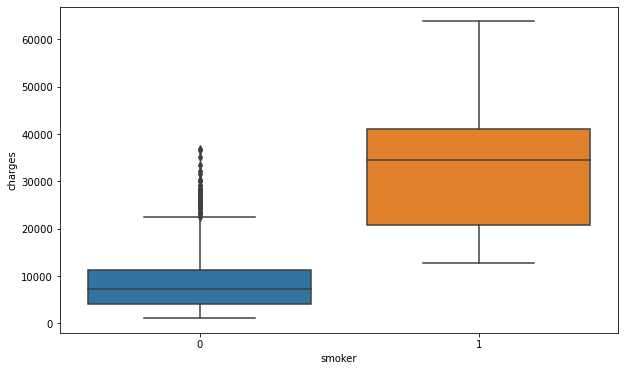

In [20]:
sns.boxplot(x = "smoker", y = "charges", data = df);

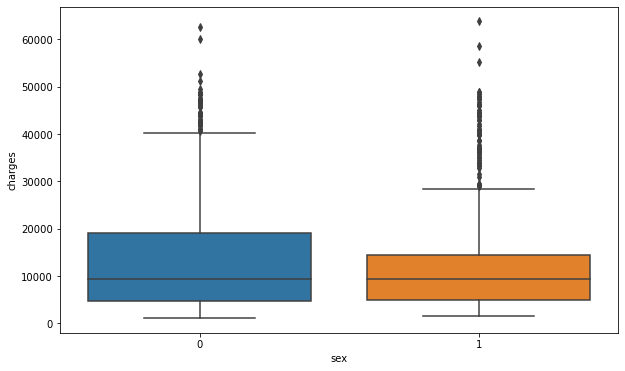

In [21]:
sns.boxplot(x = "sex", y = "charges", data = df);

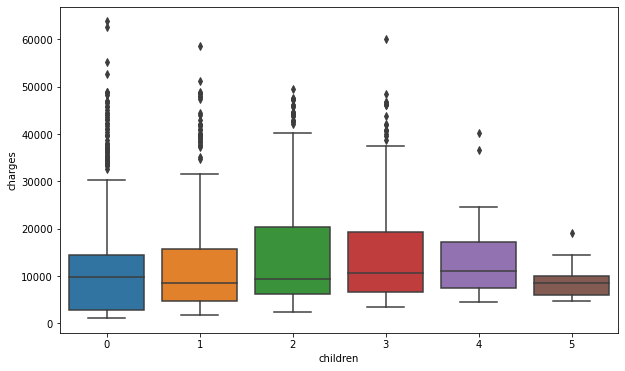

In [22]:
sns.boxplot(x = "children", y = "charges", data = df);

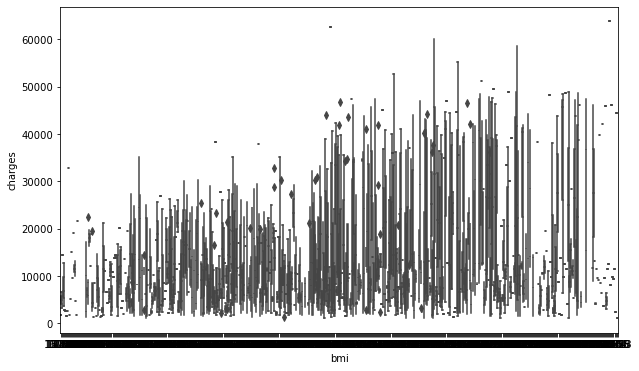

In [23]:
sns.boxplot(x = "bmi", y = "charges", data = df);

###### Boxplotlarda belirgin bir şekilde outlierları görebiliyoruz.

### Train-Test Split

In [24]:
X = df.drop(columns = "charges")
y = df["charges"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 42)

In [26]:
print("X Train Features Shape: {}\nY Train Features Shape: {}\nX Test Features Shape: {}\nY Test Features Shape: {}".format(
            X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train Features Shape: (1204, 5)
Y Train Features Shape: (1204,)
X Test Features Shape: (134, 5)
Y Test Features Shape: (134,)


In [29]:
X_train

,age,sex,bmi,children,smoker
196,39,1,32.800,0,0
1209,59,0,37.100,1,0
353,33,0,35.245,0,0
461,42,0,30.000,0,1
629,44,1,38.950,0,1
...,...,...,...,...,...
1095,18,1,31.350,4,0
1130,39,1,23.870,5,0
1294,58,0,25.175,0,0
860,37,1,47.600,2,1


In [30]:
y_train

196      5649.71500
1209    12347.17200
353     12404.87910
461     22144.03200
629     42983.45850
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1204, dtype: float64

### Model Fitting and Compare Actual and Predicted Labels

In [31]:
model = LinearRegression()
model

LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
model.intercept_

-11987.311073953246

In [34]:
model.coef_

array([  259.54626405,   254.23355399,   314.14334498,   446.78353836,
       23915.23937267])

###### Datayı henüz scale etmediğimiz için katsayılardan herhangi bir çıkarım yapamayız. 

In [35]:
y_pred = model.predict(X_test) 
y_pred

array([ 8748.63014884,  7041.17120213, 37238.86658161,  9379.7881039 ,
       26886.76288747, 10760.79494179,   271.23890923, 16531.25331666,
         965.75630812, 11083.57904702, 28719.76445281,  9157.29775174,
        5536.04925382, 38511.37772001, 40355.44981827, 37252.91163931,
       15285.89445895, 36334.69052802,  9464.55499135, 31788.39503661,
        4243.28916413, 10307.81840325,  2494.02563043,  6481.41613612,
       11418.29715841, 12548.62525264, 14866.12973178,  6164.97991188,
        9715.37694353,  2152.80209668,  9640.30720338, 13058.67148482,
        4671.57246458,  3660.82074895,  4631.97567913, 12196.74665523,
        2457.56187094,  9267.08138743, 33705.63003598, 32776.22308619,
        4416.71885525,  4017.88413867, 14494.62855544, 11324.00806811,
        8701.90729947, 12411.64403024,  5175.60179353,  3729.61297939,
       35728.50438688,  9012.15320213, 16021.74053791,  2357.69525941,
       12107.37392949,   891.51656658, 13363.23508047, 11970.71201254,
      

In [36]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [37]:
comparing = pd.DataFrame(my_dict)
comparing.head(10)

,Actual,pred,residual
764,9095.06825,8748.630149,346.438101
887,5272.17580,7041.171202,-1768.995402
890,29330.98315,37238.866582,-7907.883432
1293,9301.89355,9379.788104,-77.894554
259,33750.29180,26886.762887,6863.528913
1312,4536.25900,10760.794942,-6224.535942
899,2117.33885,271.238909,1846.099941
752,14210.53595,16531.253317,-2320.717367
1286,3732.62510,965.756308,2766.868792
707,10264.44210,11083.579047,-819.136947


In [38]:
sample=comparing.head(10)

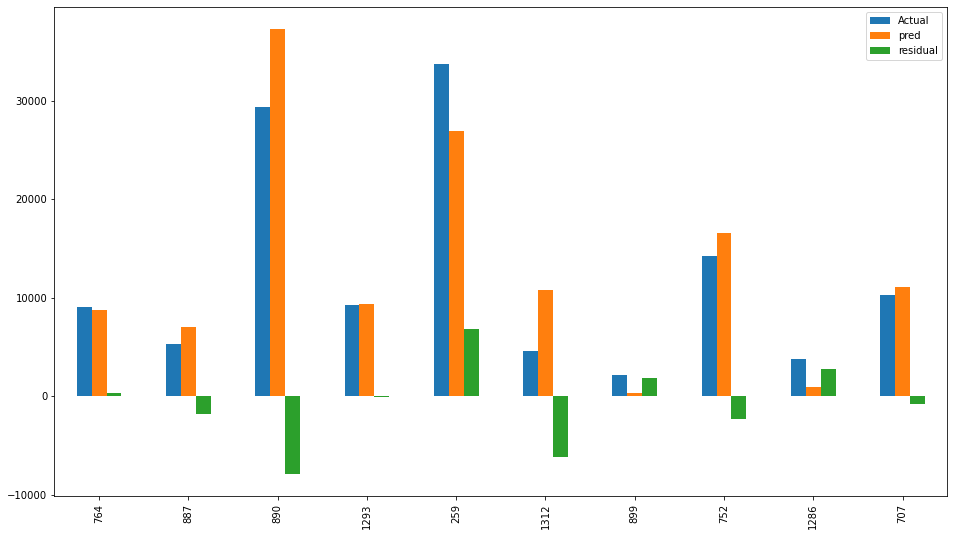

In [39]:
sample.plot(kind = "bar", figsize = (16, 9))
plt.show()

### Error Metrics

In [40]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.7622204758053099

###### R2 skorumuz (0.76) oldukça kötü çıktı. 

In [41]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

4123.435920365719

In [42]:
MSE = mean_squared_error(y_test, y_pred)
MSE

32802945.33428212

In [43]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

5727.3855583749655

### Evaluation Model

In [44]:
def eval_metric(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {MAE}")
    print(f"MSE \t\t: {MSE}")
    print(f"RMSE \t\t: {RMSE}")

In [50]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.7622204758053099
MAE 		: 4123.435920365719
MSE 		: 32802945.33428212
RMSE 		: 5727.3855583749655


In [46]:
y_train_pred = model.predict(X_train)
y_train_pred

array([ 8693.12849332, 15427.42014208,  7649.69783353, ...,
       10974.93095075, 37632.16392037, 11680.61946365])

In [49]:
eval_metric(y_train, y_train_pred) 

Model testing performance: 
---------------------------
R2_score 	: 0.7482776178297046
MAE 		: 4183.482811556873
MSE 		: 37122223.09921636
RMSE 		: 6092.800923977113


In [48]:
lm_score = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "R2" : r2_score(y_train, y_train_pred)},
           "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
                        "mae" : mean_absolute_error(y_test, y_pred),
                        "mse" : mean_squared_error(y_test, y_pred),
                        "R2" : r2_score(y_test, y_pred)}}
ls = pd.DataFrame(lm_score)
ls     # 1 SKORLAR

,lm_train,lm_test
rmse,6.092801e+03,5.727386e+03
mae,4.183483e+03,4.123436e+03
mse,3.712222e+07,3.280295e+07
R2,7.482776e-01,7.622205e-01


##### Train R2 skoru, Test R2 skorundan daha az olduğundan dolayı Underfitting var. Modelimiz yeterince öğrenememiş.

### Is data suitable for linear regression?

In [51]:
residuals = y_test - y_pred

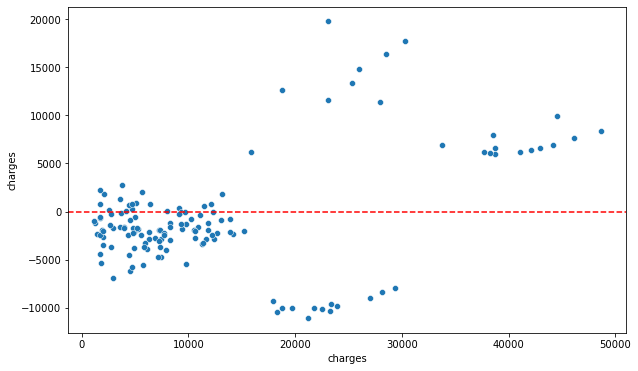

In [52]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) 
plt.axhline(y= 0, color = "r", linestyle = "--")
plt.show()

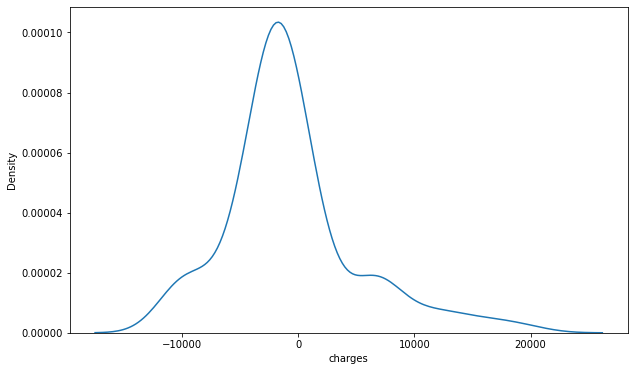

In [53]:
sns.kdeplot(residuals)
plt.show()

In [54]:
skew(residuals)

1.097708395633779

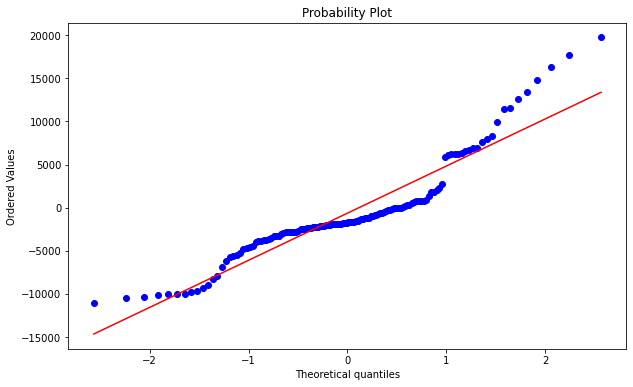

In [55]:
stats.probplot(residuals, dist= "norm", plot= plt);

###### 3 grafiğe baktığımızda hata terimlerimizin simetrik dağılmadığını, çarpıklık oranının yüksek olduğunu, linearitye uygun olmadığını dolayısıyla modelimizi polinomial olarak kırmamız gerektiğini görebiliyoruz.

### Polinomial Conversion Degree=3

In [56]:
from sklearn.preprocessing import PolynomialFeatures
polinomial_converter = PolynomialFeatures(degree = 3, include_bias= False)
poly_features = polinomial_converter.fit_transform(X)

In [57]:
poly_features

array([[19.  ,  1.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  0.  , 33.77, ...,  0.  ,  0.  ,  0.  ],
       [28.  ,  0.  , 33.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [18.  ,  1.  , 36.85, ...,  0.  ,  0.  ,  0.  ],
       [21.  ,  1.  , 25.8 , ...,  0.  ,  0.  ,  0.  ],
       [61.  ,  1.  , 29.07, ...,  0.  ,  0.  ,  1.  ]])

In [58]:
poly_features.shape

(1338, 55)

### Train | Test Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.1, random_state= 42)

### Scaling the Data

In [60]:
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler, RobustScaler

In [61]:
scaler = StandardScaler()

In [62]:
scaler.fit(X_train)
X_train

array([[39.   ,  1.   , 32.8  , ...,  0.   ,  0.   ,  0.   ],
       [59.   ,  0.   , 37.1  , ...,  0.   ,  0.   ,  0.   ],
       [33.   ,  0.   , 35.245, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [58.   ,  0.   , 25.175, ...,  0.   ,  0.   ,  0.   ],
       [37.   ,  1.   , 47.6  , ...,  4.   ,  2.   ,  1.   ],
       [55.   ,  0.   , 29.9  , ...,  0.   ,  0.   ,  0.   ]])

In [63]:
X_train = scaler.transform(X_train)
X_train

array([[-0.01469359,  1.01506361,  0.36618845, ..., -0.26907064,
        -0.32944804, -0.50932723],
       [ 1.40627649, -0.98515994,  1.06914341, ..., -0.26907064,
        -0.32944804, -0.50932723],
       [-0.44098461, -0.98515994,  0.76589191, ..., -0.26907064,
        -0.32944804, -0.50932723],
       ...,
       [ 1.33522798, -0.98515994, -0.88033051, ..., -0.26907064,
        -0.32944804, -0.50932723],
       [-0.15679059,  1.01506361,  2.78566134, ...,  1.81093613,
         2.59789837,  1.96337432],
       [ 1.12208247, -0.98515994, -0.10789745, ..., -0.26907064,
        -0.32944804, -0.50932723]])

In [64]:
X_test = scaler.transform(X_test)

In [65]:
X_test

array([[ 0.41159744,  1.01506361, -0.88033051, ..., -0.26907064,
        -0.32944804, -0.50932723],
       [-0.2278391 ,  1.01506361, -0.0882801 , ..., -0.26907064,
        -0.32944804, -0.50932723],
       [ 1.76151901,  1.01506361, -0.60078331, ..., -0.26907064,
        -0.32944804,  1.96337432],
       ...,
       [-0.2988876 , -0.98515994,  0.61467486, ..., -0.26907064,
        -0.32944804, -0.50932723],
       [-0.2988876 ,  1.01506361,  0.86643082, ..., -0.26907064,
        -0.32944804, -0.50932723],
       [ 0.41159744,  1.01506361,  1.26286472, ..., -0.26907064,
        -0.32944804, -0.50932723]])

In [66]:
pd.DataFrame(X_train).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [67]:
pd.DataFrame(X_test).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [69]:
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = lm.predict(X_test)

In [71]:
y_pred

array([ 9645.6813812 ,  5921.88287417, 30402.24752485,  9170.83588234,
       28176.46886369,  6473.32942213,  2970.0026088 , 14394.45275887,
        5674.33536244, 10763.53510187, 20058.55508828,  8471.8540153 ,
        6079.43053386, 49028.72053831, 54273.82357521, 46428.86215676,
       10799.86630123, 43966.39006796,  9783.35267776, 26652.32635811,
        5977.93712763,  9278.4913653 ,  2350.4675956 ,  3474.54431618,
       11903.87984085, 12054.46040205, 14658.65488857,  6973.28105739,
       10380.72569354,  2150.35031114,  8573.70203959, 13117.52777148,
        3550.08841532,  7634.15460307,  5210.53582942,  8706.57017392,
        5562.17345752,  9036.21555208, 24011.61452257, 38696.45024763,
        8186.62211418,  5062.41421082, 14345.64075274, 13067.31019208,
        7479.26252178, 13674.62245244,  6883.79066188,  7215.78969349,
       41137.0445386 ,  7254.85281621, 15977.13263755,  4510.79091096,
        7739.9335588 ,  1442.02224968, 12184.07745746, 11388.73586546,
      

In [76]:
lm.intercept_

13321.096786402992

In [77]:
lm.coef_

array([  1726.36827379,   1358.73965225, -17076.89391979,   7408.34732645,
        -4901.98919623,   6357.20091618,  -3482.27154655,  -2568.39081577,
       -13420.99549103,   1177.81520049,   1358.73965225,  -1015.85860532,
          660.36219901,    227.22359978,  38077.31030295,   2087.6360867 ,
        14385.64919904,  -4242.40347989,     90.34567301,  -4901.98919623,
        -2977.85225704,   2219.6657614 ,   1519.07545075,   5076.83305551,
        -3206.92376495,  -3482.27154655,   3932.52410262,    200.33831127,
        -1104.20468917,   -999.18708193,   3243.87926808,   3606.85421846,
         1855.48343258,    101.89478179,   1177.81520049,   1358.73965225,
        -1015.85860532,    660.36219901,    227.22359978,   -870.97713592,
        -1067.35185347,    189.94108278,   -351.27532633,    279.70342357,
          227.22359978, -19881.94965292,  -2497.28137492,  -6718.19066834,
          488.15563543,  -1403.14232519,  14385.64919904,   1105.80332309,
          576.58386815,  

### Evaluate Model

In [78]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [79]:
y_train_pred = lm.predict(X_train)

In [80]:
y_train_pred

array([ 6991.45452093, 14178.01379487,  5814.09461752, ...,
       12753.45905639, 48229.89555637, 11727.19296111])

In [81]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8479761271281533
MAE 		: 2838.437294181859
MSE 		: 22419397.41908877
RMSE 		: 4734.912609445793


In [82]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8591593380439597
MAE 		: 2688.1416636221215
MSE 		: 19429715.61842862
RMSE 		: 4407.915110165874


In [83]:
lmp_score = {"lmp_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "R2" : r2_score(y_train, y_train_pred)},
           "lmp_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
                        "mae" : mean_absolute_error(y_test, y_pred),
                        "mse" : mean_squared_error(y_test, y_pred),
                        "R2" : r2_score(y_test, y_pred)}}
lps = pd.DataFrame(lmp_score)
lps                                            

,lmp_train,lmp_test
rmse,4.734913e+03,4.407915e+03
mae,2.838437e+03,2.688142e+03
mse,2.241940e+07,1.942972e+07
R2,8.479761e-01,8.591593e-01


In [ ]:
İLK TEST SONUÇLARI
R2_score 	: 0.7622204758053099
MAE 		: 4123.435920365719
MSE 		: 32802945.33428212
RMSE 		: 5727.3855583749655

İLK TRAIN SONUÇLARI
R2_score 	: 0.7482776178297046
MAE 		: 4183.482811556873
MSE 		: 37122223.09921636
RMSE 		: 6092.800923977113

POLİNOM DEGREE=3 VE SCALE YAPTIKTAN SONRAKİ TEST SONUÇLARI
R2_score 	: 0.8591593380439597
MAE 		: 2688.1416636221215
MSE 		: 19429715.61842862
RMSE 		: 4407.915110165874

POLİNOM DEGREE=3 VE SCALE YAPTIKTAN SONRAKİ TRAIN SONUÇLARI
R2_score 	: 0.8479761271281533
MAE 		: 2838.437294181859
MSE 		: 22419397.41908877
RMSE 		: 4734.912609445793


### Multicolineratiy

In [84]:
def color_red(val):
    if val > 0.9 and val < 0.99999:
        color = "red"
    else:
        color = "black"
    return f"color: {color}"

In [85]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.020856,0.109272,0.042469,-0.025019,0.988380,0.333274,0.879840,0.253328,0.144777,0.020856,0.038508,0.057739,-0.013064,0.100717,0.062840,-0.018383,0.023855,0.011263,-0.025019,0.959865,0.481415,0.933327,0.374274,0.244234,0.333274,0.335804,0.182695,0.093604,0.696122,0.262175,0.147399,0.172550,0.092970,0.144777,0.020856,0.038508,0.057739,-0.013064,0.049537,0.070816,-0.004386,0.045827,0.007571,-0.013064,0.090653,0.074312,-0.013409,0.039252,0.016920,-0.018383,0.006263,0.005904,0.011263,-0.025019
1,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.020460,0.894372,-0.006280,0.001785,-0.069657,1.000000,0.963015,0.539570,0.309870,-0.046190,-0.022822,-0.089114,-0.017917,-0.075710,-0.076185,0.019725,0.742149,0.003535,0.016423,-0.058118,0.894372,0.856696,0.509458,0.289325,-0.021698,-0.003156,-0.079328,-0.001833,-0.072156,-0.069657,1.000000,0.963015,0.539570,0.309870,0.874061,0.522988,0.301694,0.398367,0.201097,0.309870,-0.045744,-0.025067,-0.093671,-0.018792,-0.089920,-0.089114,-0.018214,-0.064801,-0.075710,-0.076185
2,0.109272,-0.046371,1.000000,0.012759,0.003750,0.112804,-0.011158,0.539637,0.048974,0.013957,-0.046371,0.143179,-0.012020,-0.053077,0.991400,0.187193,0.108741,0.003777,-0.002036,0.003750,0.113443,0.013474,0.371335,0.071637,0.021892,-0.011158,0.153524,0.013636,-0.035438,0.738428,0.203318,0.107528,0.031511,0.008074,0.013957,-0.046371,0.143179,-0.012020,-0.053077,0.295488,0.095462,0.021139,-0.001655,-0.062541,-0.053077,0.966832,0.328564,0.197333,0.121636,0.075838,0.108741,-0.003655,-0.016950,-0.002036,0.003750
3,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.003259,0.009066,0.043180,0.927389,0.020320,-0.017163,-0.012378,0.576163,-0.021941,0.012470,0.966148,0.006249,0.923007,0.333928,0.007673,-0.041494,0.004503,0.003170,0.798688,0.015794,0.009066,0.014841,0.546813,-0.013455,0.038208,0.886342,0.019381,0.884828,0.317144,0.020320,-0.017163,-0.012378,0.576163,-0.021941,-0.006119,0.562218,-0.028626,0.581741,0.195024,-0.021941,0.012231,0.881321,0.006837,0.902598,0.322377,0.006249,0.799541,0.348418,0.333928,0.007673
4,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.026120,-0.076763,-0.022946,0.005198,0.926984,-0.076185,-0.083759,-0.055087,0.604270,0.007047,0.005616,0.974487,-0.009131,0.651806,1.000000,-0.025790,-0.068538,-0.026620,0.003818,0.801588,-0.076763,-0.081432,-0.056939,0.564205,-0.016902,0.002330,0.900497,-0.010643,0.624135,0.926984,-0.076185,-0.083759,-0.055087,0.604270,-0.081587,-0.065585,0.588326,-0.048613,0.392154,0.604270,0.010066,0.006702,0.908452,-0.013033,0.643067,0.974487,-0.025197,0.530709,0.651806,1.000000
5,0.988380,0.020460,0.112804,-0.003259,-0.026120,1.000000,0.330114,0.874095,0.209707,0.141826,0.020460,0.039180,0.033007,-0.011836,0.104462,0.019294,-0.018663,-0.007480,-0.004379,-0.026120,0.991134,0.487867,0.947399,0.344009,0.247156,0.330114,0.333875,0.159639,0.094241,0.694474,0.222287,0.145514,0.141270,0.077729,0.141826,0.020460,0.039180,0.033007,-0.011836,0.050820,0.047900,-0.003271,0.028451,-0.002091,-0.011836,0.094393,0.034838,-0.013190,0.009324,0.002268,-0.018663,-0.016360,-0.007385,-0.004379,-0.026120
6,0.333274,0.894372,-0.011158,0.009066,-0.076763,0.330114,1.000000,0.267320,0.092740,-0.023800,0.894372,0.873011,0.512142,0.264721,-0.013130,0.010816,-0.084253,0.001753,-0.066356,-0.076763,0.321198,0.960092,0.293625,0.143989,0.014729,1.000000,0.968412,0.565081,0.314459,0.193753,0.091275,-0.031668,0.064172,-0.043543,-0.023800,0.894372,0.873011,0.512142,0.264721,0.801648,0.505848,0.263036,0.380151,0.182004,0.264721,-0.014821,0.012209,-0.085289,0.006124,-0.077307,-0.084253,-0.005417,-0.057174,-0.066356,-0.076763
7,0.879840,-0.006280,0.539637,0.043180,-0.022946,0.874095,0.267320,1.000000,0.235579,0.123784,-0.006280,0.094775,0.044899,-0.033359,0.530853,0.139620,0.028517,0.023748,0.007266,-0.022946,0.852818,0.401142,0.972972,0.348297,0.211279,0.267

##### Multi-collineraty olduğunu tespit ettik.

### Cross Validate

In [86]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [87]:
from sklearn.model_selection import cross_validate, cross_val_score

In [88]:
model = LinearRegression()

In [89]:
scores = cross_validate(model, X_train, y_train, scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"], cv=10)

In [90]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001994,0.000994,0.859161,-2977.877484,-2.219170e+07,-4710.806647
2,0.001993,0.000997,0.855810,-2794.900780,-2.247844e+07,-4741.142856
3,0.000996,0.000997,0.813294,-3054.301342,-2.683542e+07,-5180.291809
4,0.001993,0.000996,0.901209,-2559.525115,-1.506544e+07,-3881.422561
5,0.001993,0.000997,0.881533,-2760.812866,-2.032422e+07,-4508.239654
6,0.002069,0.000000,0.787973,-3445.420972,-3.019406e+07,-5494.911931
7,0.001987,0.000000,0.771449,-3040.350291,-2.561994e+07,-5061.614007
8,0.000921,0.000997,0.740602,-3361.028336,-3.088722e+07,-5557.626921
9,0.000996,0.000995,0.843551,-2933.226832,-2.728006e+07,-5223.032084
10,0.001996,0.000000,0.857287,-2664.327921,-1.998970e+07,-4470.984754


In [91]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                             8.311869e-01
test_neg_mean_absolute_error       -2.959177e+03
test_neg_mean_squared_error        -2.408662e+07
test_neg_root_mean_squared_error   -4.883007e+03
dtype: float64

In [92]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8591593380439597
MAE 		: 2688.1416636221215
MSE 		: 19429715.61842862
RMSE 		: 4407.915110165874


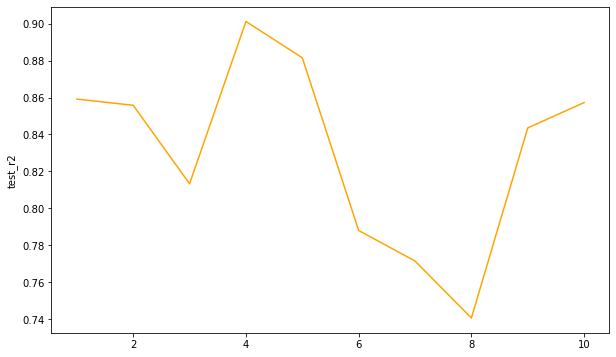

In [93]:
sns.lineplot(data = scores.iloc[:,2],color="orange");

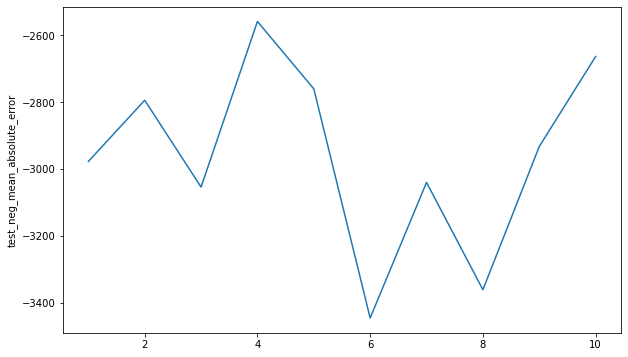

In [94]:
sns.lineplot(data = scores.iloc[:,3]);

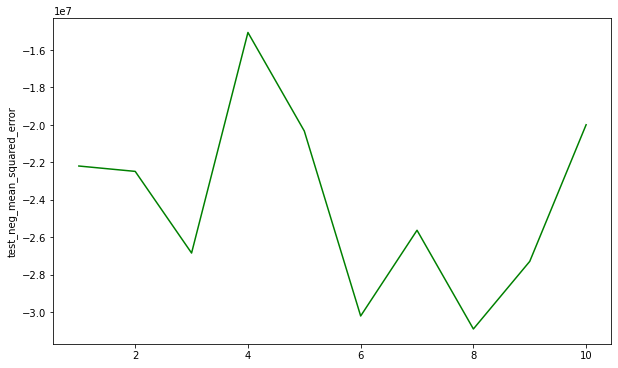

In [95]:
sns.lineplot(data = scores.iloc[:,4], color="green");

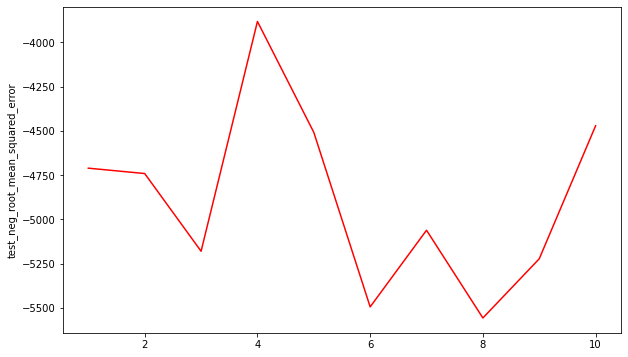

In [96]:
sns.lineplot(data = scores.iloc[:,5], color="red");

##### Cross-Validation yaptığımız zaman 4 error metriğimizin, ayırdığımız bu 10 parçada birbirlerine uzak değerler  gösterdiğini grafiklerden görüyoruz.

In [97]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,1726.368274
1,1358.739652
2,-17076.893920
3,7408.347326
4,-4901.989196
...,...
50,14385.649199
51,1105.803323
52,576.583868
53,90.345673


In [98]:
lm_df.describe()

,lm_coef
count,55.000000
mean,279.101549
std,7595.875317
min,-19881.949653
25%,-1950.211850
50%,227.223600
75%,1438.907552
max,38077.310303


##### Katsayıların dağılımında dengesizlik olduğunu görüyoruz.

### Ridge Regression

In [99]:
from sklearn.linear_model import  Ridge
from sklearn.linear_model import RidgeCV

#### Choosing best alpha value with Cross-Validation

In [100]:
alpha_space = np.linspace(0.001, 1, 1000)
alpha_space

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

In [101]:
ridge_cv_model = RidgeCV(alphas= alpha_space, cv = 10, scoring= "neg_root_mean_squared_error")

In [102]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.0...
       0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953, 0.954,
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [103]:
ridge_cv_model.alpha_

0.18

In [104]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8591593380439597
MAE 		: 2688.1416636221215
MSE 		: 19429715.61842862
RMSE 		: 4407.915110165874


In [105]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8473309675321543
MAE 		: 2847.028834109061
MSE 		: 22514540.958772384
RMSE 		: 4744.948994327799


In [106]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,4.744949e+03,4.407915e+03
mae,2.847029e+03,2.688142e+03
mse,2.251454e+07,1.942972e+07
R2,8.473310e-01,8.591593e-01


In [107]:
pd.concat([ls,lps,rcs], axis = 1)   

,lm_train,lm_test,lmp_train,lmp_test,ridge_cv_train,ridge_cv_test
rmse,6.092801e+03,5.727386e+03,4.734913e+03,4.407915e+03,4.744949e+03,4.407915e+03
mae,4.183483e+03,4.123436e+03,2.838437e+03,2.688142e+03,2.847029e+03,2.688142e+03
mse,3.712222e+07,3.280295e+07,2.241940e+07,1.942972e+07,2.251454e+07,1.942972e+07
R2,7.482776e-01,7.622205e-01,8.479761e-01,8.591593e-01,8.473310e-01,8.591593e-01


In [108]:
ridge_cv_model.coef_

array([ 2.17223930e+03,  1.26925089e+03, -5.01374645e+03,  6.20397346e+03,
       -4.03878801e+03,  3.65985632e+03, -3.00250820e+03, -1.92809224e+03,
       -1.09369311e+04,  9.30671733e+02,  1.26925089e+03, -1.28614534e+03,
        7.29017988e+02,  2.63518189e+02,  1.39199288e+04,  1.75778977e+03,
        1.19101539e+04, -3.71615631e+03,  1.00746701e+02, -4.03878801e+03,
       -1.12216788e+03,  2.29510663e+03,  1.03157196e+03,  4.31750113e+03,
       -2.91170107e+03, -3.00250820e+03,  2.80873973e+03,  1.42505714e+02,
       -1.06075412e+03, -4.86154838e+02,  2.44049669e+03,  3.62048297e+03,
        1.39756805e+03,  4.00601492e+01,  9.30671733e+02,  1.26925089e+03,
       -1.28614534e+03,  7.29017988e+02,  2.63518189e+02,  9.32094286e+01,
       -1.13782599e+03, -1.82106903e-02, -3.56283086e+02,  2.84814957e+02,
        2.63518189e+02, -8.14052238e+03, -1.95406421e+03, -4.01128018e+03,
        6.28486529e+02, -1.34461850e+03,  1.19101539e+04,  9.25069648e+02,
        5.59232603e+02,  

In [109]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["Ridge_cv_coef_0.18"])

In [110]:
pd.concat([lm_df, rcm_df], axis = 1)

,lm_coef,Ridge_cv_coef_0.18
0,1726.368274,2172.239299
1,1358.739652,1269.250890
2,-17076.893920,-5013.746449
3,7408.347326,6203.973463
4,-4901.989196,-4038.788012
...,...,...
50,14385.649199,11910.153916
51,1105.803323,925.069648
52,576.583868,559.232603
53,90.345673,100.746701


### LASSO

In [111]:
from sklearn.linear_model import Lasso, LassoCV

#### Choosing best alpha value with Cross-Validation

In [112]:
lasso_cv_model = LassoCV(alphas= alpha_space, cv = 10, max_iter = 100000)

In [113]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.0...
       0.937, 0.938, 0.939, 0.94 , 0.941, 0.942, 0.943, 0.944, 0.945,
       0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953, 0.954,
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ]),
        cv=10, max_iter=100000)

In [114]:
lasso_cv_model.alpha_

0.992

In [115]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8475108947418414
MAE 		: 2846.0695032430162
MSE 		: 22488006.57608446
RMSE 		: 4742.152103853741


In [116]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8597713289941058
MAE 		: 2702.4690180581288
MSE 		: 19345288.22397274
RMSE 		: 4398.327889547656


In [117]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,4.742152e+03,4.398328e+03
mae,2.846070e+03,2.702469e+03
mse,2.248801e+07,1.934529e+07
R2,8.475109e-01,8.597713e-01


In [118]:
pd.concat([ls, lps, rcs, lcs], axis = 1)

,lm_train,lm_test,lmp_train,lmp_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
rmse,6.092801e+03,5.727386e+03,4.734913e+03,4.407915e+03,4.744949e+03,4.407915e+03,4.742152e+03,4.398328e+03
mae,4.183483e+03,4.123436e+03,2.838437e+03,2.688142e+03,2.847029e+03,2.688142e+03,2.846070e+03,2.702469e+03
mse,3.712222e+07,3.280295e+07,2.241940e+07,1.942972e+07,2.251454e+07,1.942972e+07,2.248801e+07,1.934529e+07
R2,7.482776e-01,7.622205e-01,8.479761e-01,8.591593e-01,8.473310e-01,8.591593e-01,8.475109e-01,8.597713e-01


In [119]:
lasso_cv_model.coef_

array([ 1.82078575e+03,  2.73946406e+02, -9.25048107e+03,  6.93994763e+03,
       -0.00000000e+00,  2.54327515e+03, -2.38547937e+03, -0.00000000e+00,
       -1.09296675e+04,  1.40827234e+03,  1.92382942e+03, -0.00000000e+00,
        6.52111050e+02,  6.96218991e+02,  2.15885339e+04,  0.00000000e+00,
        1.34607820e+04, -3.25716172e+03,  1.17103205e+02, -5.33483198e+03,
       -0.00000000e+00,  1.86039906e+03,  0.00000000e+00,  4.47814426e+03,
       -2.63822927e+03, -2.49371211e+03,  2.32204168e+03,  1.12641388e+02,
       -1.02936872e+03, -9.68548414e+02,  2.34867523e+03,  3.59993935e+03,
        1.26231767e+03,  3.76761293e+01,  0.00000000e+00,  3.19746572e+02,
       -7.41574297e+02,  5.76836592e+02,  0.00000000e+00, -7.38810041e+02,
       -9.32471066e+02,  5.57563091e+01, -3.16487708e+02,  2.81378435e+02,
        1.29110591e+01, -1.18634967e+04, -9.95210739e+02, -4.38146077e+03,
        4.73175390e+02, -1.22657215e+03,  1.09167318e+04,  8.08669398e+02,
        5.33058530e+02,  

In [120]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.992"])

In [121]:
pd.concat([lm_df, rcm_df, lcm_df], axis = 1)

,lm_coef,Ridge_cv_coef_0.18,lasso_cv_coef_0.992
0,1726.368274,2172.239299,1820.785751
1,1358.739652,1269.250890,273.946406
2,-17076.893920,-5013.746449,-9250.481072
3,7408.347326,6203.973463,6939.947627
4,-4901.989196,-4038.788012,-0.000000
...,...,...,...
50,14385.649199,11910.153916,10916.731792
51,1105.803323,925.069648,808.669398
52,576.583868,559.232603,533.058530
53,90.345673,100.746701,0.000000


### Elastic net

In [122]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [123]:
elastic_model = ElasticNet()

In [124]:
elastic_model.fit(X_train, y_train)

ElasticNet()

In [125]:
elastic_model.l1_ratio

0.5

In [126]:
elastic_model.alpha

1.0

In [129]:
y_train_pred = elastic_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8085451531753745
MAE 		: 3530.960234639989
MSE 		: 28234396.464760344
RMSE 		: 5313.6048465011345


In [130]:
y_pred = elastic_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8201374496599836
MAE 		: 3432.371841873387
MSE 		: 24812991.894362114
RMSE 		: 4981.264085988828


In [131]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}};
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,5.313605e+03,4.981264e+03
mae,3.530960e+03,3.432372e+03
mse,2.823440e+07,2.481299e+07
R2,8.085452e-01,8.201374e-01


In [132]:
pd.concat([ls, lps, rcs, lcs, es], axis = 1)

,lm_train,lm_test,lmp_train,lmp_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,6.092801e+03,5.727386e+03,4.734913e+03,4.407915e+03,4.744949e+03,4.407915e+03,4.742152e+03,4.398328e+03,5.313605e+03,4.981264e+03
mae,4.183483e+03,4.123436e+03,2.838437e+03,2.688142e+03,2.847029e+03,2.688142e+03,2.846070e+03,2.702469e+03,3.530960e+03,3.432372e+03
mse,3.712222e+07,3.280295e+07,2.241940e+07,1.942972e+07,2.251454e+07,1.942972e+07,2.248801e+07,1.934529e+07,2.823440e+07,2.481299e+07
R2,7.482776e-01,7.622205e-01,8.479761e-01,8.591593e-01,8.473310e-01,8.591593e-01,8.475109e-01,8.597713e-01,8.085452e-01,8.201374e-01


In [133]:
elastic_model.coef_

array([ 5.35930535e+02, -5.26493701e+01,  2.75220192e+02,  1.05647651e+02,
        7.40191498e+02,  6.01413040e+02,  8.83590472e+01,  4.64415240e+02,
        7.76205131e+01,  4.40485163e+02, -5.26380895e+01, -4.19280167e+01,
        5.76770256e+01, -1.16613048e+01,  1.33941511e+02,  1.29521974e+02,
        1.49455639e+03, -8.45551913e+00,  8.75986809e+00,  7.40168769e+02,
        6.46608503e+02,  2.11671106e+02,  5.08040043e+02,  1.44447825e+02,
        2.31368977e+02,  8.83833222e+01,  6.95455555e+01,  2.62361757e+01,
       -2.02751528e+02,  2.72377863e+02,  9.39234776e+01,  1.10796320e+03,
       -3.09162862e+01, -1.12280033e+02,  4.40440394e+02, -5.26321810e+01,
       -4.19371096e+01,  5.76519375e+01, -1.16969409e+01, -6.41788934e+01,
        2.38829127e+01,  4.96793089e+02, -2.99949782e+01, -2.10390962e+02,
       -1.16938766e+01, -2.46162175e+01,  8.11364525e+01,  2.04657348e+03,
       -1.75709360e+00,  5.00842241e+02,  1.49453832e+03, -6.41904948e+01,
       -8.73995783e+01,  

In [134]:
em_df = pd.DataFrame(elastic_model.coef_, columns= ["elastic_coef_(alp: 1, l1: 0.5)"])

In [135]:
pd.concat([lm_df, rcm_df, lcm_df, em_df], axis = 1)

,lm_coef,Ridge_cv_coef_0.18,lasso_cv_coef_0.992,"elastic_coef_(alp: 1, l1: 0.5)"
0,1726.368274,2172.239299,1820.785751,535.930535
1,1358.739652,1269.250890,273.946406,-52.649370
2,-17076.893920,-5013.746449,-9250.481072,275.220192
3,7408.347326,6203.973463,6939.947627,105.647651
4,-4901.989196,-4038.788012,-0.000000,740.191498
...,...,...,...,...
50,14385.649199,11910.153916,10916.731792,1494.538316
51,1105.803323,925.069648,808.669398,-64.190495
52,576.583868,559.232603,533.058530,-87.399578
53,90.345673,100.746701,0.000000,8.757104


##### Cross validate ile en iyi katsayıyı bulmaya çalışacağız.

In [139]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.01, 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.94, 0.98, 1], cv = 10, max_iter = 100000)

In [140]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.05...
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ]),
             cv=10,
             l1_ratio=[0.01, 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.94, 0.98, 1],
             max_iter=100000)

In [141]:
elastic_cv_model.alpha_

0.992

In [142]:
elastic_cv_model.l1_ratio_

1.0

In [143]:
elastic_cv_model.coef_

array([ 1.82078575e+03,  2.73946406e+02, -9.25048107e+03,  6.93994763e+03,
       -0.00000000e+00,  2.54327515e+03, -2.38547937e+03, -0.00000000e+00,
       -1.09296675e+04,  1.40827234e+03,  1.92382942e+03, -0.00000000e+00,
        6.52111050e+02,  6.96218991e+02,  2.15885339e+04,  0.00000000e+00,
        1.34607820e+04, -3.25716172e+03,  1.17103205e+02, -5.33483198e+03,
       -0.00000000e+00,  1.86039906e+03,  0.00000000e+00,  4.47814426e+03,
       -2.63822927e+03, -2.49371211e+03,  2.32204168e+03,  1.12641388e+02,
       -1.02936872e+03, -9.68548414e+02,  2.34867523e+03,  3.59993935e+03,
        1.26231767e+03,  3.76761293e+01,  0.00000000e+00,  3.19746572e+02,
       -7.41574297e+02,  5.76836592e+02,  0.00000000e+00, -7.38810041e+02,
       -9.32471066e+02,  5.57563091e+01, -3.16487708e+02,  2.81378435e+02,
        1.29110591e+01, -1.18634967e+04, -9.95210739e+02, -4.38146077e+03,
        4.73175390e+02, -1.22657215e+03,  1.09167318e+04,  8.08669398e+02,
        5.33058530e+02,  

In [144]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns= ["elastic_coef_(alp: 0.992, l1: 1)"])

In [146]:
pd.concat([lm_df, rcm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,Ridge_cv_coef_0.18,lasso_cv_coef_0.992,"elastic_coef_(alp: 1, l1: 0.5)","elastic_coef_(alp: 0.992, l1: 1)"
0,1726.368274,2172.239299,1820.785751,535.930535,1820.785751
1,1358.739652,1269.250890,273.946406,-52.649370,273.946406
2,-17076.893920,-5013.746449,-9250.481072,275.220192,-9250.481072
3,7408.347326,6203.973463,6939.947627,105.647651,6939.947627
4,-4901.989196,-4038.788012,-0.000000,740.191498,-0.000000
...,...,...,...,...,...
50,14385.649199,11910.153916,10916.731792,1494.538316,10916.731792
51,1105.803323,925.069648,808.669398,-64.190495,808.669398
52,576.583868,559.232603,533.058530,-87.399578,533.058530
53,90.345673,100.746701,0.000000,8.757104,0.000000


In [147]:
y_train_pred = elastic_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8475108947418414
MAE 		: 2846.0695032430162
MSE 		: 22488006.57608446
RMSE 		: 4742.152103853741


In [148]:
y_pred = elastic_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8597713289941058
MAE 		: 2702.4690180581288
MSE 		: 19345288.22397274
RMSE 		: 4398.327889547656


In [149]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,4.742152e+03,4.398328e+03
mae,2.846070e+03,2.702469e+03
mse,2.248801e+07,1.934529e+07
R2,8.475109e-01,8.597713e-01


In [150]:
pd.concat([ls, lps, rcs, lcs, es, ecs], axis = 1)

,lm_train,lm_test,lmp_train,lmp_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,6.092801e+03,5.727386e+03,4.734913e+03,4.407915e+03,4.744949e+03,4.407915e+03,4.742152e+03,4.398328e+03,5.313605e+03,4.981264e+03,4.742152e+03,4.398328e+03
mae,4.183483e+03,4.123436e+03,2.838437e+03,2.688142e+03,2.847029e+03,2.688142e+03,2.846070e+03,2.702469e+03,3.530960e+03,3.432372e+03,2.846070e+03,2.702469e+03
mse,3.712222e+07,3.280295e+07,2.241940e+07,1.942972e+07,2.251454e+07,1.942972e+07,2.248801e+07,1.934529e+07,2.823440e+07,2.481299e+07,2.248801e+07,1.934529e+07
R2,7.482776e-01,7.622205e-01,8.479761e-01,8.591593e-01,8.473310e-01,8.591593e-01,8.475109e-01,8.597713e-01,8.085452e-01,8.201374e-01,8.475109e-01,8.597713e-01


### Grid Search

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
elastic_model = ElasticNet(max_iter = 10000)

In [153]:
param_grid = {"alpha": [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
             "l1_ratio": [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [154]:
grid_model = GridSearchCV(estimator= elastic_model, param_grid= param_grid, scoring = "neg_root_mean_squared_error", cv = 10, verbose = 2)

In [155]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.1s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [157]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 1}

In [158]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.149200,0.011302,0.000000,0.000000,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-4656.019809,-4636.432396,-5263.003845,-3809.600986,-4487.748567,-5486.896770,-5040.872515,-5601.085998,-5356.568116,-4556.561698,-4889.479070,529.225768,18
1,0.213855,0.016942,0.000000,0.000000,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-4657.975488,-4630.583409,-5262.353290,-3809.788186,-4482.081931,-5492.795074,-5041.211676,-5591.698662,-5356.452931,-4552.229621,-4887.717027,529.457927,16
2,0.200660,0.016509,0.000854,0.002419,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-4658.653130,-4627.254031,-5260.455437,-3812.647177,-4479.972519,-5496.521851,-5043.770974,-5583.531420,-5352.072256,-4547.231387,-4886.211018,528.390321,14
3,0.201354,0.011189,0.001111,0.002398,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-4658.750940,-4626.259688,-5240.916107,-3828.308514,-4482.000087,-5495.853326,-5053.297832,-5564.642255,-5325.086997,-4530.801561,-4880.591731,520.205306,12
4,0.203018,0.014861,0.000299,0.000457,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-4659.667087,-4632.895305,-5220.354265,-3845.173229,-4488.141308,-5488.662007,-5063.905169,-5554.026780,-5301.489192,-4517.369392,-4877.168373,511.619448,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0.001088,0.000327,0.000614,0.000502,100,0.7,"{'alpha': 100, 'l1_ratio': 0.7}",-9821.416953,-10058.018116,-9562.834037,-9607.145330,-10324.694791,-9550.024847,-8290.027692,-8891.385583,-10533.737348,-9236.039539,-9587.532424,633.155476,53
52,0.000918,0.000341,0.000425,0.000521,100,0.9,"{'alpha': 100, 'l1_ratio': 0.9}",-7692.064546,-8104.689188,-7836.206243,-7469.349159,-8047.945684,-7816.989759,-6864.494768,-7594.666529,-8575.651567,-7280.080117,-7728.213756,448.847793,50
53,0.001563,0.004688,0.000000,0.000000,100,0.95,"{'alpha': 100, 'l1_ratio': 0.95}",-6560.265000,-6992.674471,-6967.792418,-6285.130625,-6816.877560,-6948.890933,-6306.506995,-7015.005840,-7565.486953,-6295.789818,-6775.442061,391.691788,48
54,0.001562,0.004687,0.001562,0.004686,100,0.99,"{'alpha': 100, 'l1_ratio': 0.99}",-5281.445599,-5504.406020,-5884.094738,-4728.909599,-5362.746335,-5978.389430,-5757.710887,-6268.137318,-6237.695562,-5218.231866,-5622.176735,465.656091,40


### Using Best Model From GridSearch

In [159]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 1}

In [160]:
y_pred = grid_model.predict(X_test)

In [161]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8583148636031146
MAE 		: 2737.592011952256
MSE 		: 19546215.34233488
RMSE 		: 4421.110193416907


In [162]:
y_train_pred = grid_model.predict(X_train)

In [163]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8446948001593826
MAE 		: 2885.24769815637
MSE 		: 22903304.137061015
RMSE 		: 4785.739664572345


In [164]:
grid_search_scores = {"grid_search_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "grid_search_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
gcs = pd.DataFrame(grid_search_scores)
gcs

,grid_search_train,grid_search_test
rmse,4.785740e+03,4.421110e+03
mae,2.885248e+03,2.737592e+03
mse,2.290330e+07,1.954622e+07
R2,8.446948e-01,8.583149e-01


In [165]:
pd.concat([ls, lps, rcs, lcs, es, ecs, gcs], axis = 1)

,lm_train,lm_test,lmp_train,lmp_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,grid_search_train,grid_search_test
rmse,6.092801e+03,5.727386e+03,4.734913e+03,4.407915e+03,4.744949e+03,4.407915e+03,4.742152e+03,4.398328e+03,5.313605e+03,4.981264e+03,4.742152e+03,4.398328e+03,4.785740e+03,4.421110e+03
mae,4.183483e+03,4.123436e+03,2.838437e+03,2.688142e+03,2.847029e+03,2.688142e+03,2.846070e+03,2.702469e+03,3.530960e+03,3.432372e+03,2.846070e+03,2.702469e+03,2.885248e+03,2.737592e+03
mse,3.712222e+07,3.280295e+07,2.241940e+07,1.942972e+07,2.251454e+07,1.942972e+07,2.248801e+07,1.934529e+07,2.823440e+07,2.481299e+07,2.248801e+07,1.934529e+07,2.290330e+07,1.954622e+07
R2,7.482776e-01,7.622205e-01,8.479761e-01,8.591593e-01,8.473310e-01,8.591593e-01,8.475109e-01,8.597713e-01,8.085452e-01,8.201374e-01,8.475109e-01,8.597713e-01,8.446948e-01,8.583149e-01


##### BÜTÜN SKORLARIMIZI YANYANA MUKAYESELİ BİR ŞEKİLDE GÖRMÜŞ OLDUK.

### CONCLUSION and EVALUATION

In [183]:
df1=pd.concat([ls, lps, rcs, lcs, es, ecs, gcs], axis = 1)

In [186]:
df2=df1.iloc[[3],[0,2,4,6,8,10,12]] 

In [187]:
df2

,lm_train,lmp_train,ridge_cv_train,lasso_cv_train,elastic_train,elastic_cv_train,grid_search_train
R2,0.748278,0.847976,0.847331,0.847511,0.808545,0.847511,0.844695


<AxesSubplot:>

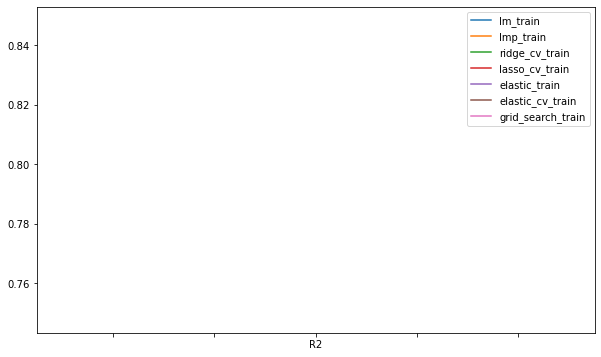

In [188]:
df2.plot(kind="line")

In [189]:
df3=df1.iloc[[3],[1,3,5,7,9,11]]

In [190]:
df3

,lm_test,lmp_test,ridge_cv_test,lasso_cv_test,elastic_test,elastic_cv_test
R2,0.76222,0.859159,0.859159,0.859771,0.820137,0.859771


<AxesSubplot:>

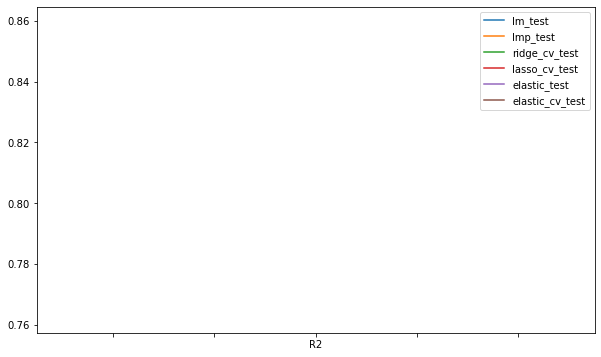

In [192]:
df3.plot(kind="line")